In [20]:
import matplotlib
import pandas as pd
import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from nexa_preprocessing.utils.time_series_operations import slice_by

In [22]:
from config import emotion_id_to_emotion, mapper

In [23]:
df = pd.read_csv("data/full_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_bor_p_3,0190feb305e543098d8b643e190bef34,26,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
1,A102_cont_p_2,0190feb305e543098d8b643e190bef34,32,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
2,A102_cont_v_2,0190feb305e543098d8b643e190bef34,32,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
3,A102_dou_p_3,0190feb305e543098d8b643e190bef34,3,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
4,A200_anx_v_2,0190feb305e543098d8b643e190bef34,34,neg,1,A200,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
...,...,...,...,...,...,...,...,...,...,...
164995,A91_amu_p_3,ebef64132b5848809b54b7aa1726b446,13,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164996,A91_det_p_2,ebef64132b5848809b54b7aa1726b446,2,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164997,A91_ele_p_2,ebef64132b5848809b54b7aa1726b446,8,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164998,A91_ple_p_3,ebef64132b5848809b54b7aa1726b446,23,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0


In [24]:
slices = slice_by(df, "alias")
len(slices)

1250

In [25]:
complete_aliases = []
incomplete_aliases = []

for s in slices:
    all_rows_equal_1000 = (s['emotion_id_reply'] == 1000).all()
    if not all_rows_equal_1000:
        has_emotion_id_1000 = (s['emotion_id_reply'] == 1000).any()
        if has_emotion_id_1000:
            incomplete_aliases.append(s)
        else:
            complete_aliases.append(s)

In [26]:
len(complete_aliases)

275

In [27]:
len(incomplete_aliases)

10

In [28]:
# Specify the path to your JSON file
meta_file_path = "data/meta.json"

# Open and read the JSON file
with open(meta_file_path, 'r') as json_file:
    # Load the JSON data into a Python dictionary
    data_dict = json.load(json_file)

In [29]:
filtered_aliases = []
for s in complete_aliases:
    if s["alias"].isin(data_dict).any():
        filtered_aliases.append(s)

In [30]:
len(filtered_aliases)

266

In [31]:
df = pd.concat(filtered_aliases, ignore_index=True)
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
35107,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35108,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35109,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35110,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


In [32]:
y_true = df[["emotion_id"]]
y_pred = df[["emotion_id_reply"]]

In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")
conf_matrix

array([[0.21618357, 0.03140097, 0.        , ..., 0.        , 0.        ,
        0.04951691],
       [0.00911458, 0.46614583, 0.        , ..., 0.        , 0.        ,
        0.01171875],
       [0.        , 0.        , 0.5720339 , ..., 0.02966102, 0.01271186,
        0.        ],
       ...,
       [0.        , 0.        , 0.02150538, ..., 0.25      , 0.02016129,
        0.        ],
       [0.        , 0.        , 0.00956284, ..., 0.03278689, 0.33606557,
        0.        ],
       [0.08928571, 0.02619048, 0.        , ..., 0.        , 0.        ,
        0.18095238]])

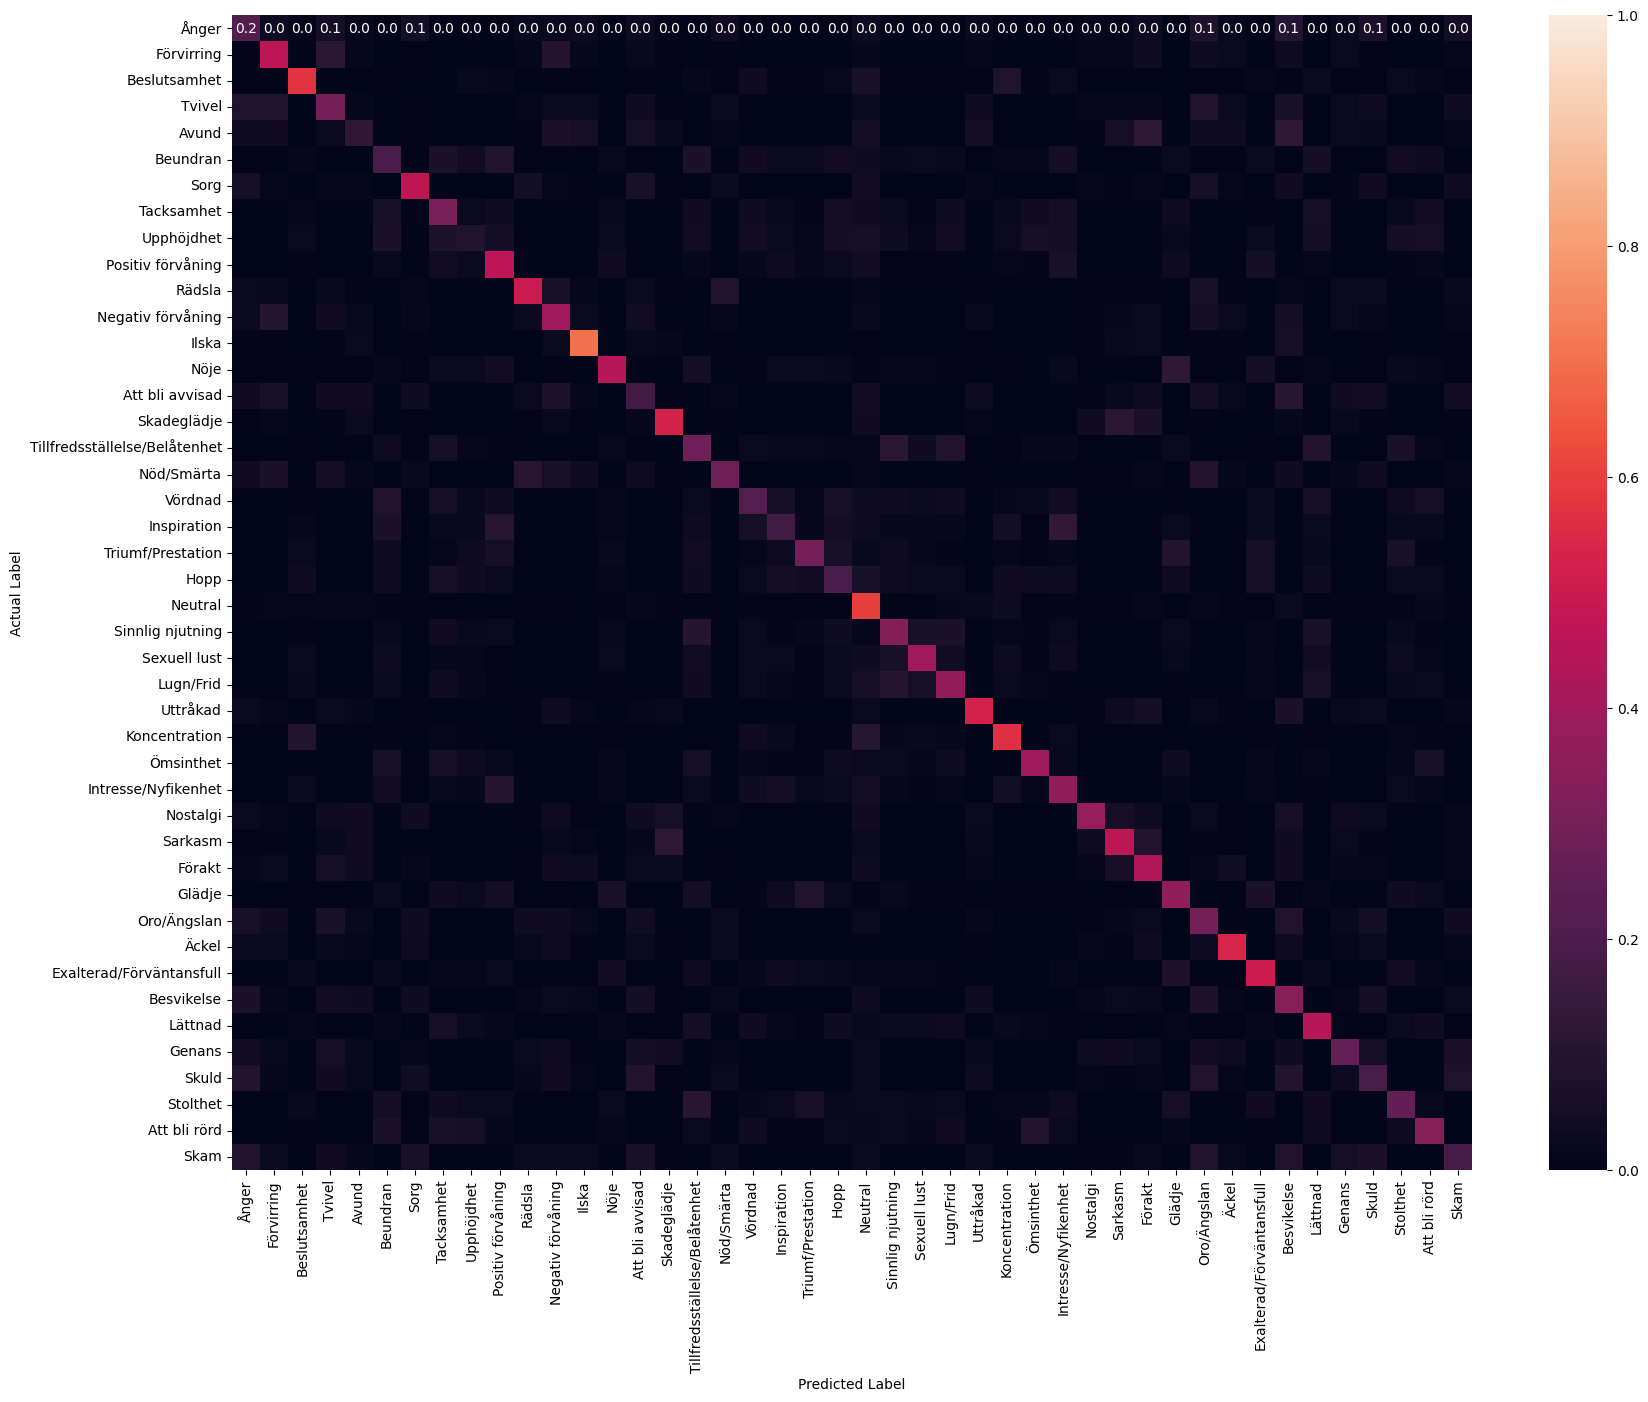

In [35]:

# get emotion_ids
emotion_ids = np.unique(y_true)

# get emotion abreviations
emotion_abrs = mapper(emotion_ids, emotion_id_to_emotion)

# create dataframe with lists of emotion ids as row and column names
df_cm = pd.DataFrame(conf_matrix, list(emotion_abrs), list(emotion_abrs))

# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(44), columns=range(44))

turquoise_rgb = (118 / 255, 183 / 255, 178 / 255)
blue_rgb = (78 / 255, 121 / 255, 167 / 255)

# More color definitions
conf_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [(255 / 255, 255 / 255, 215 / 255), turquoise_rgb,
                                                                     blue_rgb])

plt.figure(figsize=(20, 15))
ax = sns.heatmap(df_cm, annot=True, fmt='.1f', vmin=0, vmax=1, cmap=conf_cmap)
plt.yticks(va='center')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()